LIBRARY

In [1]:
# Standard Libraries
import io
import requests

# Data Manipulation and Analysis
import pandas as pd
import scipy.stats as stats

# Visualization
import matplotlib.pyplot as pyplot
import seaborn as sns

# Statistical Modeling
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# URL of the CSV file
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# Make an HTTP request to get the content of the CSV
response = requests.get(URL)

# Check if the request was successful
if response.status_code == 200:
    # Create a bytes buffer from the response content
    csv_data = io.StringIO(response.text)

    # Read the CSV with pandas
    missing_value_formats = ["na", "n.a.", "?", "NA", "n/a", "--"]
    df = pd.read_csv(csv_data, na_values=missing_value_formats)

    # Checking for any missing values.
    if df.isna().sum().sum() == 0:
        print("No missing values.")
    else:
        print("There are missing values in the data.")

    # Display first and last 5 records.
    print("First 5 records:")
    print(df.head())
    print("\nLast 5 records:")
    print(df.tail())

    # Display shape and info.
    print("Shape of the dataset:", df.shape)
    print("\nInformation about the dataset:\n")
    df.info()
else:
    print(f"Error downloading the file: {response.status_code}")

No missing values.
First 5 records:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  

Last 5 records:
     Unnamed: 0     CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
501         501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076  0.0  11.93   0.0 

In [3]:
# Check for null values and calculate the percentage of null values.
null_df = df.isnull().sum().sort_values().apply(lambda x: '{:.2%}'.format(x / len(df))) \
           .to_frame(name='Null Percentage').rename_axis('Column Name').reset_index()

# Print the null value information.
print("Null values per column:")
print(null_df)

Null values per column:
   Column Name Null Percentage
0   Unnamed: 0           0.00%
1         CRIM           0.00%
2           ZN           0.00%
3        INDUS           0.00%
4         CHAS           0.00%
5          NOX           0.00%
6           RM           0.00%
7          AGE           0.00%
8          DIS           0.00%
9          RAD           0.00%
10         TAX           0.00%
11     PTRATIO           0.00%
12       LSTAT           0.00%
13        MEDV           0.00%


In [4]:
# Checking if dataset has duplicate rows.
print("Duplicated rows before: ", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicated rows after: ", df.duplicated().sum())

Duplicated rows before:  0
Duplicated rows after:  0


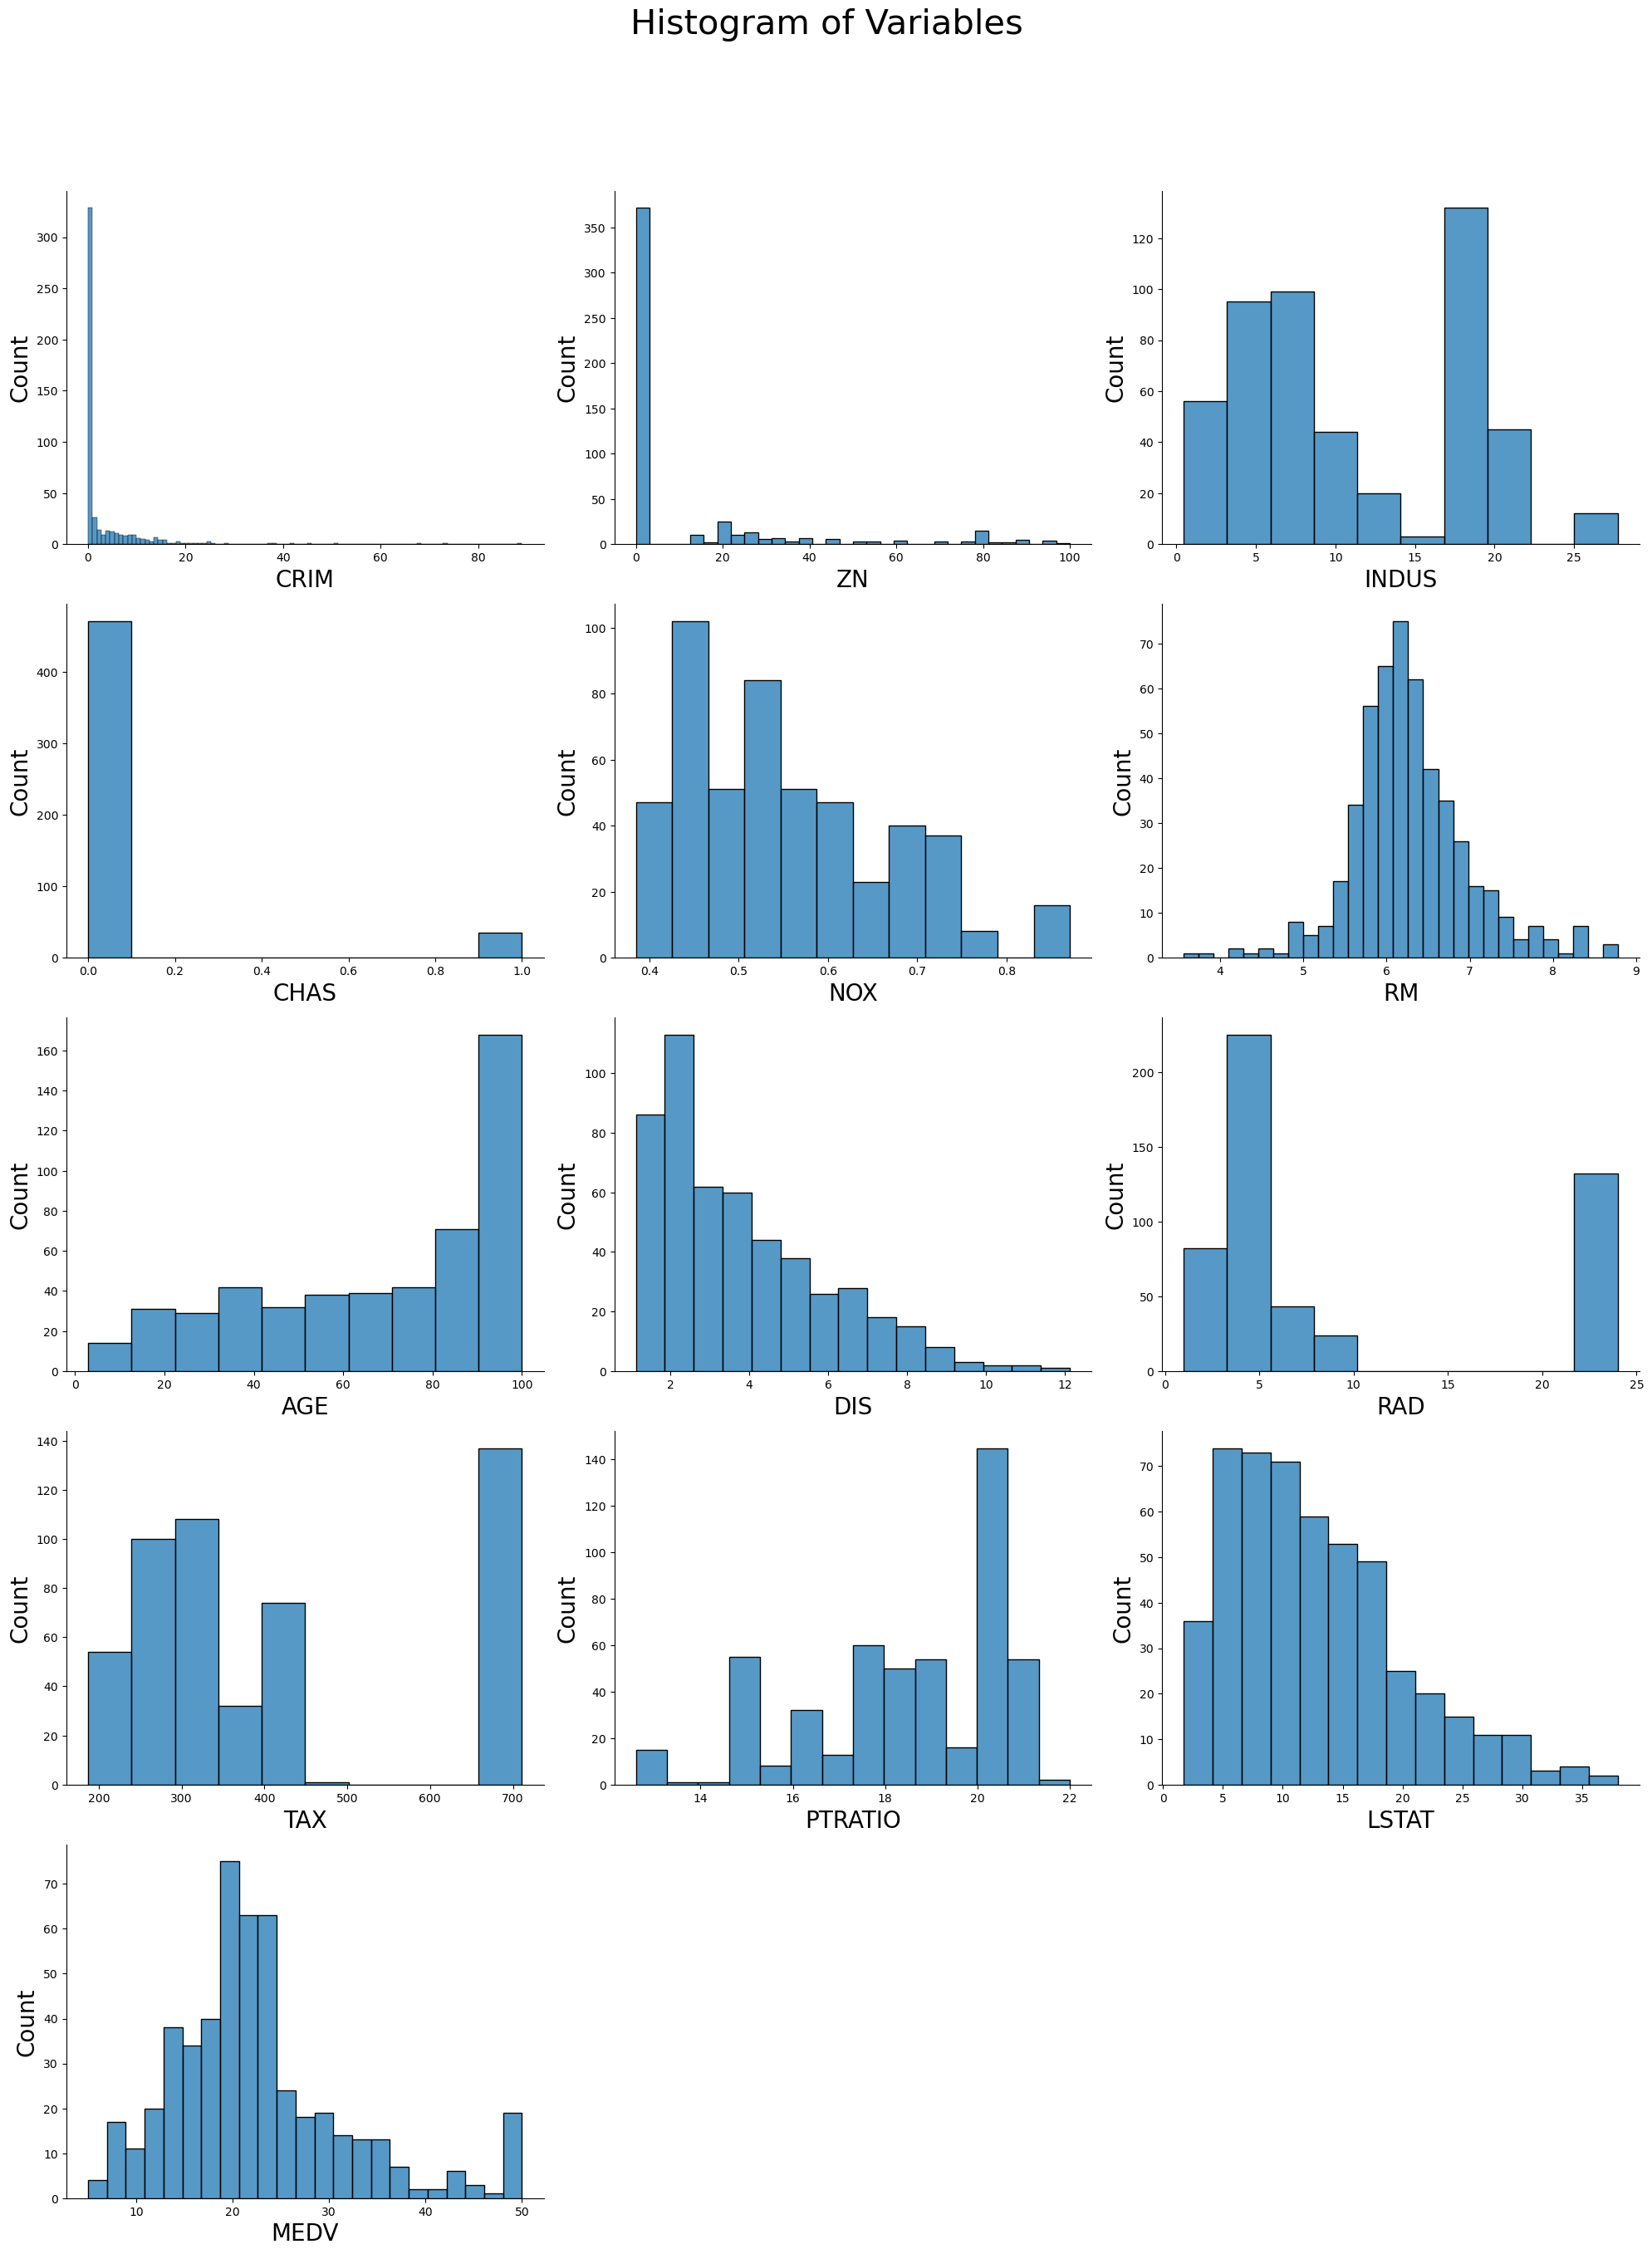

In [5]:
# Select variables for the histogram plot.
variables = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

# Create figure.
fig, axs = pyplot.subplots(nrows=6, ncols=3, figsize=(20, 30))
axs = axs.flatten() # Flatten axes.
pyplot.suptitle('Histogram of Variables', fontsize=30, y=1.05) #Title

# Loop variables and plot histogram.
for i, var in enumerate(variables):
    sns.histplot(df[var].dropna(), ax=axs[i], kde=False)
    axs[i].set_xlabel(var, fontsize=20)
    axs[i].set_ylabel('Count', fontsize=20)
    sns.despine()

# Check if there are any remaining axes and remove them.
if i < len(axs) - 1:
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

pyplot.tight_layout()
pyplot.show()

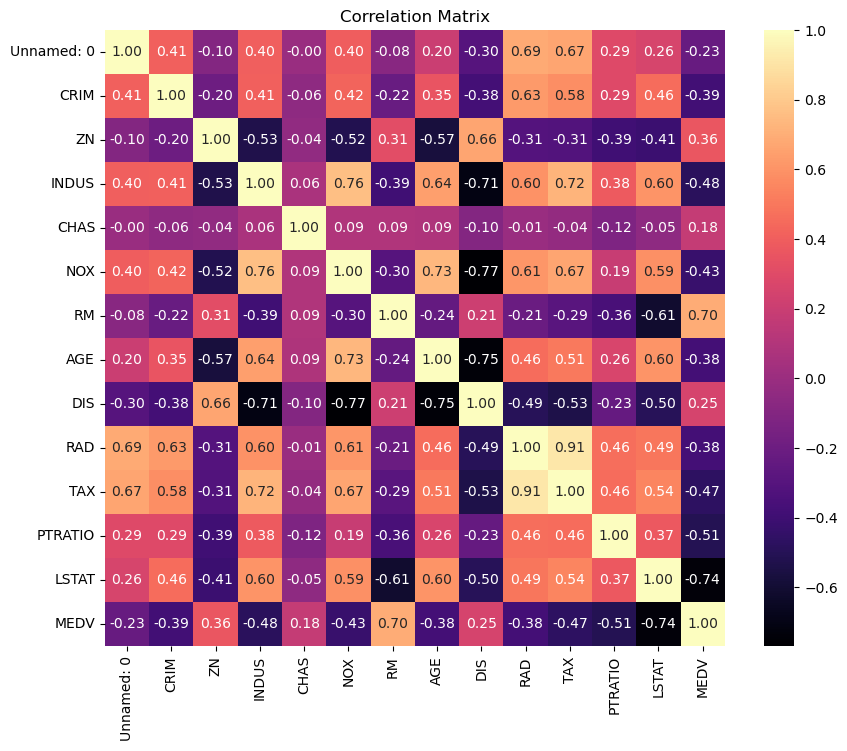

In [6]:
correlation_matrix = df.corr()

# Create a heatmap with a different color palette
pyplot.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
pyplot.title('Correlation Matrix')
pyplot.show()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,252.500000,146.213884,0.00000,126.250000,252.50000,378.750000,505.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


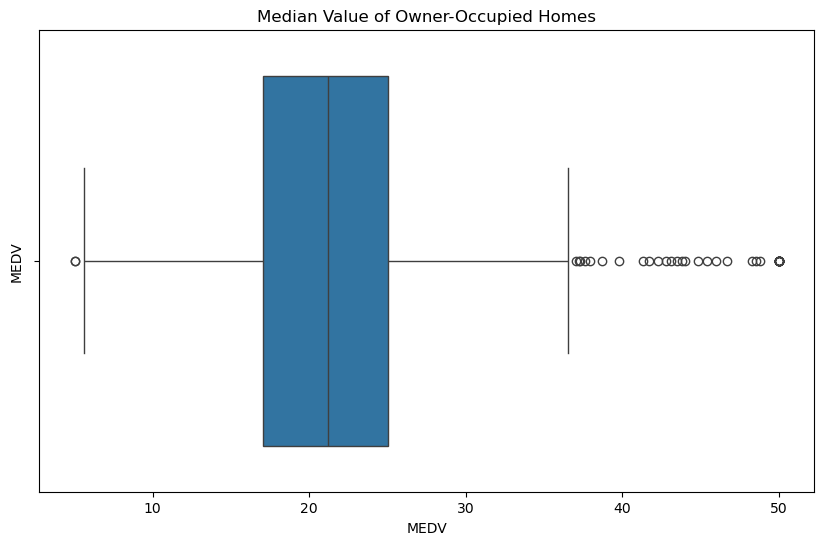

In [8]:
# For the "Median value of owner-occupied homes" provide a boxplot

pyplot.figure(figsize=(10, 6))  # Set the size of the figure
sns.boxplot(x=df['MEDV'])  # Create the boxplot for the 'MEDV' column (vertical orientation)
pyplot.title('Median Value of Owner-Occupied Homes')  # Title of the plot
pyplot.ylabel('MEDV')  # Label for the Y-axis
pyplot.show()  # Display the plot

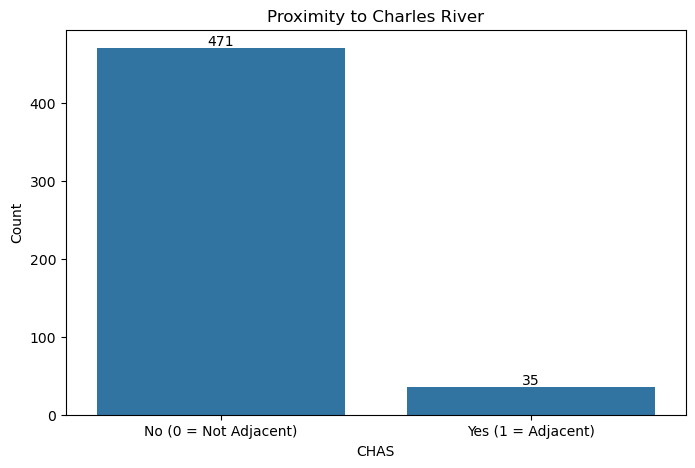

In [9]:
# Provide a  bar plot for the Charles river variable

pyplot.figure(figsize=(8, 5))  # Set the size of the figure
ax = sns.countplot(x='CHAS', data=df)  # Create a bar plot for the 'CHAS' variable

# Adding labels and title
pyplot.title('Proximity to Charles River')  # Improved title
pyplot.xlabel('CHAS')  # Label for the X-axis
pyplot.ylabel('Count')  # Label for the Y-axis

# Set custom labels for the x-axis ticks
pyplot.xticks(ticks=[0, 1], labels=['No (0 = Not Adjacent)', 'Yes (1 = Adjacent)'])  

# Adding value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

pyplot.show()  # Display the plot

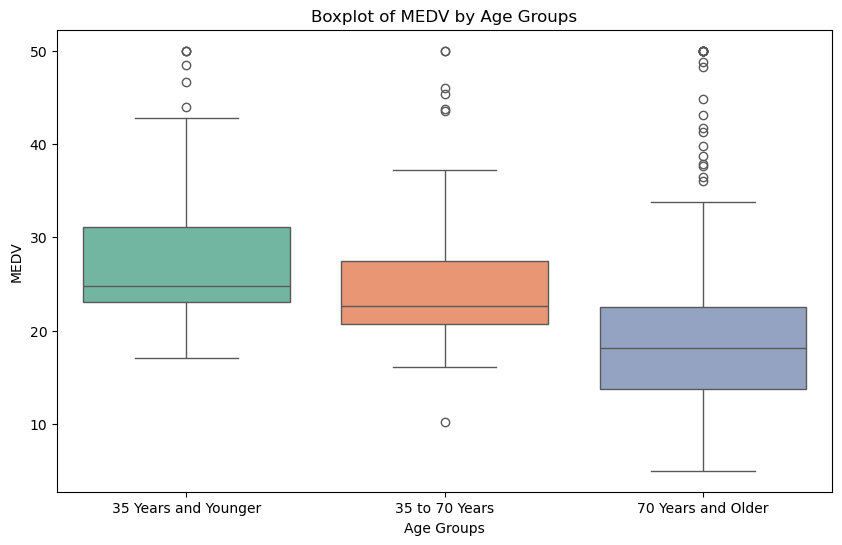

In [10]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# Discretizing the 'AGE' variable into three groups
bins = [0, 35, 70, float('inf')]  # Define the bins
labels = ['35 Years and Younger', '35 to 70 Years', '70 Years and Older']  # Define labels
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Create the boxplot with a custom palette
pyplot.figure(figsize=(10, 6))  # Set the size of the figure
palette = ['#66c2a5', '#fc8d62', '#8da0cb']  # Define colors for each age group
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df, hue='AGE_GROUP', palette=palette, legend=False)  # Create the boxplot
pyplot.title('Boxplot of MEDV by Age Groups')  # Title of the plot
pyplot.xlabel('Age Groups')  # Label for the X-axis
pyplot.ylabel('MEDV')  # Label for the Y-axis
pyplot.show()  # Display the plot

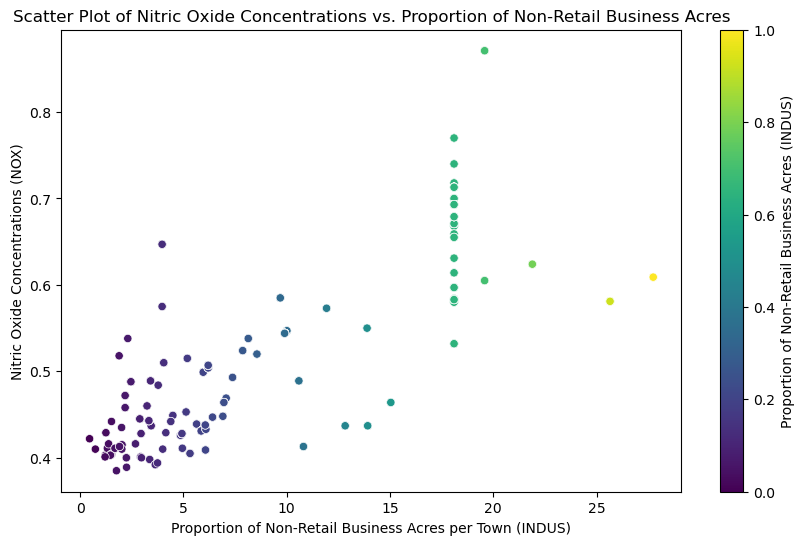

In [11]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

pyplot.figure(figsize=(10, 6))  # Set the size of the figure
scatter = sns.scatterplot(x='INDUS', y='NOX', data=df, hue='INDUS', palette='viridis', legend=None)  # Color based on 'INDUS'
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')  # Title of the plot
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')  # X-axis label
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')  # Y-axis label
pyplot.colorbar(scatter.collections[0], label='Proportion of Non-Retail Business Acres (INDUS)')  # Add color bar
pyplot.show()  # Display the plot

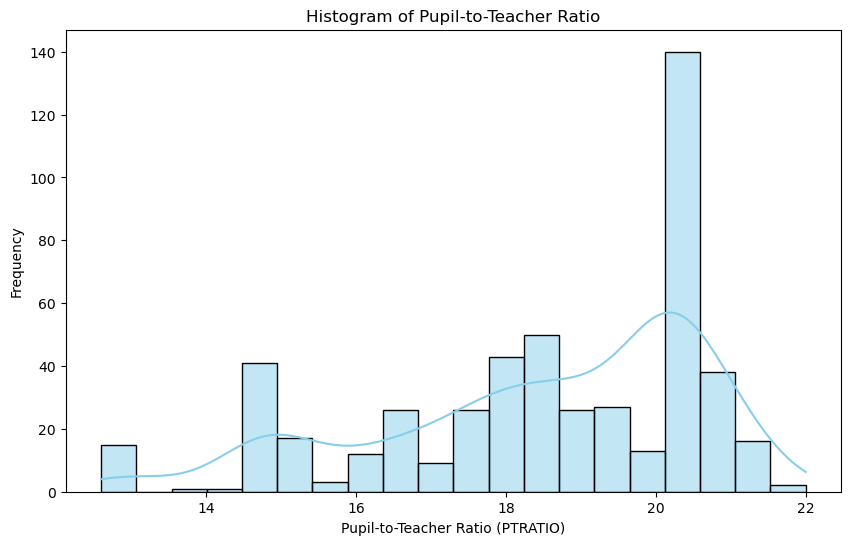

In [12]:
# Create a histogram for the pupil-to-teacher ratio variable

pyplot.figure(figsize=(10, 6))  # Set the size of the figure
sns.histplot(df['PTRATIO'], bins=20, kde=True, color='skyblue')  # Create the histogram with KDE curve
pyplot.title('Histogram of Pupil-to-Teacher Ratio')  # Title of the plot
pyplot.xlabel('Pupil-to-Teacher Ratio (PTRATIO)')  # Label for the X-axis
pyplot.ylabel('Frequency')  # Label for the Y-axis
pyplot.show()  # Display the plot

In [13]:
# Is there a significant difference in median value of houses bounded by the Charles River or not? (T-test for independent samples)

# Split the data into two groups: bounded by the Charles River (CHAS = 1) and not bounded (CHAS = 0)
medv_bounded = df[df['CHAS'] == 1]['MEDV']
medv_not_bounded = df[df['CHAS'] == 0]['MEDV']

# Perform the independent T-test
t_stat, p_value = stats.ttest_ind(medv_bounded, medv_not_bounded, equal_var=False)  # Use equal_var=False for Welch's T-test if variances differ

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in the median value of houses bounded by the Charles River and those that are not.")
else:
    print("There is no significant difference in the median value of houses bounded by the Charles River and those that are not.")

T-statistic: 3.113291312794837
P-value: 0.0035671700981375174
There is a significant difference in the median value of houses bounded by the Charles River and those that are not.


In [14]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built before 1940 (AGE)? (ANOVA)

# Discretising the 'AGE' variable into three groups
bins = [0, 35, 70, 100]  # Define bins for age categories
labels = ['35 Years and Younger', '35 to 70 Years', '70 Years and Older']  # Define labels for the bins
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Perform the ANOVA
model = ols('MEDV ~ AGE_GROUP', data=df).fit()  # Fit an ordinary least squares model
anova_table = sm.stats.anova_lm(model, typ=2)  # Perform ANOVA

# Output the results
print(anova_table)

# Extract the p-value using .iloc to avoid the warning
p_value = anova_table['PR(>F)'].iloc[0]

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in the median values of houses for different AGE groups.")
else:
    print("There is no significant difference in the median values of houses for different AGE groups.")

                 sum_sq     df         F        PR(>F)
AGE_GROUP   4339.074039    2.0  30.56684  3.435569e-13
Residual   32649.336069  460.0       NaN           NaN
There is a significant difference in the median values of houses for different AGE groups.


In [15]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# Calculate the Pearson correlation coefficient and the p-value
correlation, p_value = stats.pearsonr(df['NOX'], df['INDUS'])

# Output the results
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("There is no statistically significant relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.")

Pearson Correlation Coefficient: 0.763651446920915
P-value: 7.913361061241167e-98
There is a statistically significant relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.


Pearson Correlation Coefficient: 0.763651446920915
P-value: 7.913361061241167e-98
There is a statistically significant relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.


In [17]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

X = df['DIS']  # Independent variable (weighted distance to employment centers)
y = df['MEDV']  # Dependent variable (median value of homes)

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the results
print(model.summary())

# Extract the coefficient for DIS
dis_coefficient = model.params['DIS']
print(f"Impact of an additional unit of distance (DIS) on MEDV: {dis_coefficient}")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        17:19:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0